In [8]:
import torch
from torchvision.transforms import ToTensor, RandomAffine

from data import combine_transforms, load_data
from train_gan import initialize_model, train_model

import numpy as np

In [9]:
device = 'cuda:0'

image_shape = (3, 32, 32)

n_epochs = 50
batch_size = 64

discriminator_criterion = torch.nn.BCELoss()

In [10]:
prep = []
aug = [RandomAffine(30)]
postp = [ToTensor()]
target = []

train_transform, test_transform, target_transform = combine_transforms(preprocessing=prep, 
                                                                        augmentations=aug, 
                                                                        postprocessing=postp, 
                                                                        target=target)

In [11]:
train_loader, test_loader = load_data('../data', 
                                      train_transform, test_transform, target_transform, 
                                      batch_size, device)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
model = initialize_model(
    n_latent_features=64, 
    device=device
)

generator_optimizer = torch.optim.RMSprop(model.generator.parameters(), 1e-3)
discriminator_optimizer = torch.optim.RMSprop(model.discriminator.parameters(), 1e-3)

In [13]:
examples = train_model(
    model, 
    discriminator_criterion,
    train_loader, 
    n_epochs,
    device,
    generator_optimizer=generator_optimizer,
    discriminator_optimizer=discriminator_optimizer,
)

epoch #0 mean discriminator loss: 0.409, mean generator loss: 1.54
epoch #1 mean discriminator loss: 0.304, mean generator loss: 1.91
epoch #2 mean discriminator loss: 0.242, mean generator loss: 2.18
epoch #3 mean discriminator loss: 0.231, mean generator loss: 2.28
epoch #4 mean discriminator loss: 0.211, mean generator loss: 2.38
epoch #5 mean discriminator loss: 0.196, mean generator loss: 2.56
epoch #6 mean discriminator loss: 0.186, mean generator loss: 2.62
epoch #7 mean discriminator loss: 0.181, mean generator loss: 2.72
epoch #8 mean discriminator loss: 0.172, mean generator loss: 2.74
epoch #9 mean discriminator loss: 0.166, mean generator loss: 2.81
epoch #10 mean discriminator loss: 0.163, mean generator loss: 2.88
epoch #11 mean discriminator loss: 0.164, mean generator loss: 2.9
epoch #12 mean discriminator loss: 0.159, mean generator loss: 2.97
epoch #13 mean discriminator loss: 0.149, mean generator loss: 3.08
epoch #14 mean discriminator loss: 0.139, mean generator lo

C:\Users\Alex\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


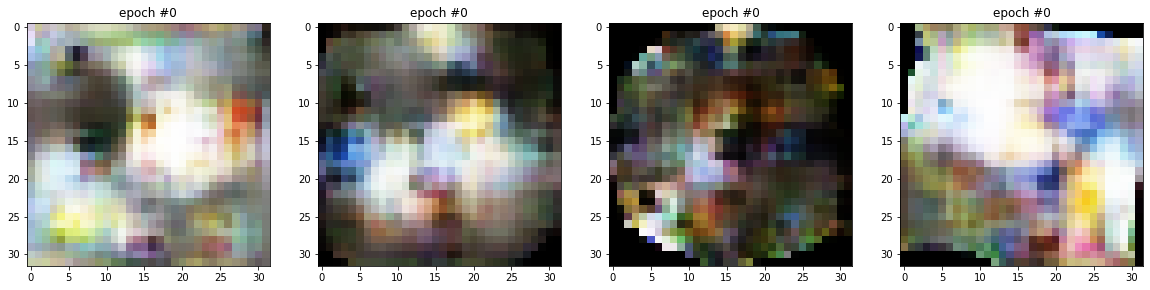

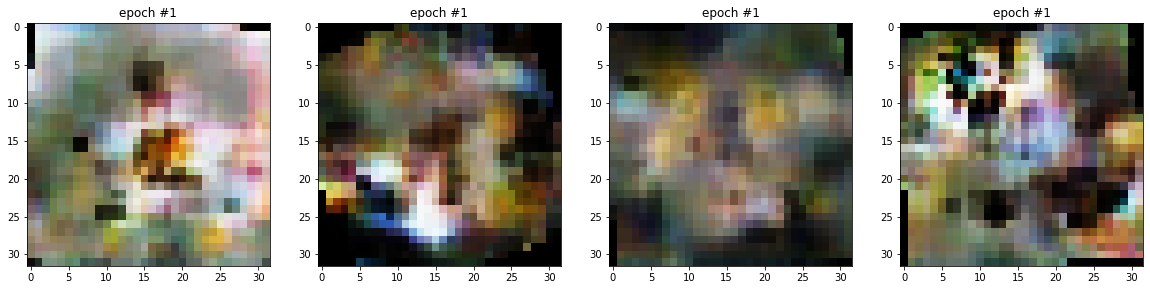

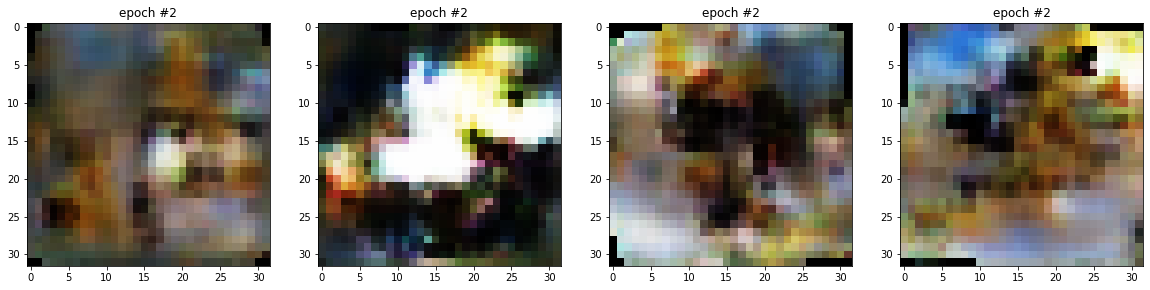

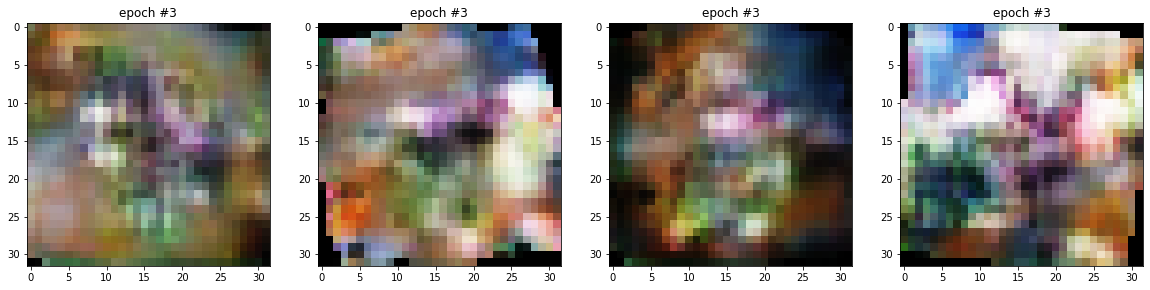

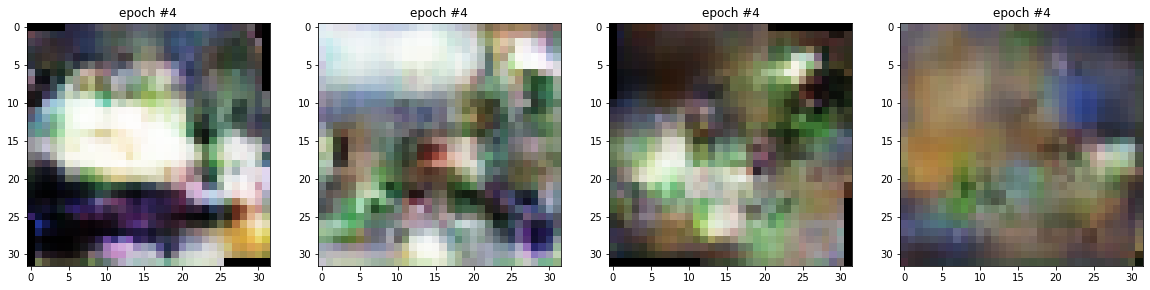

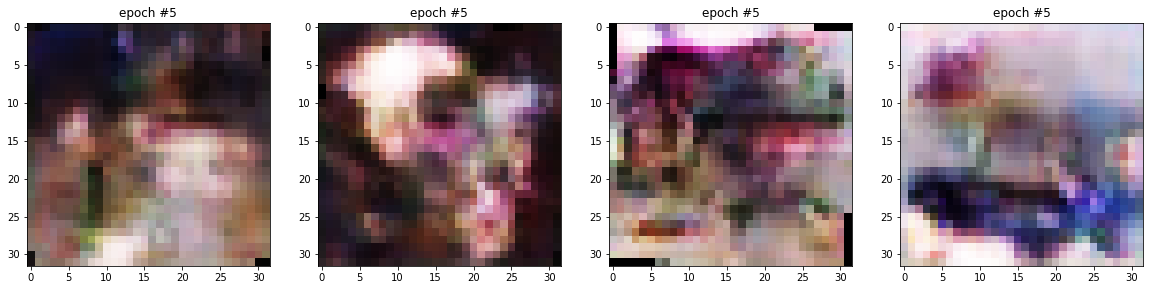

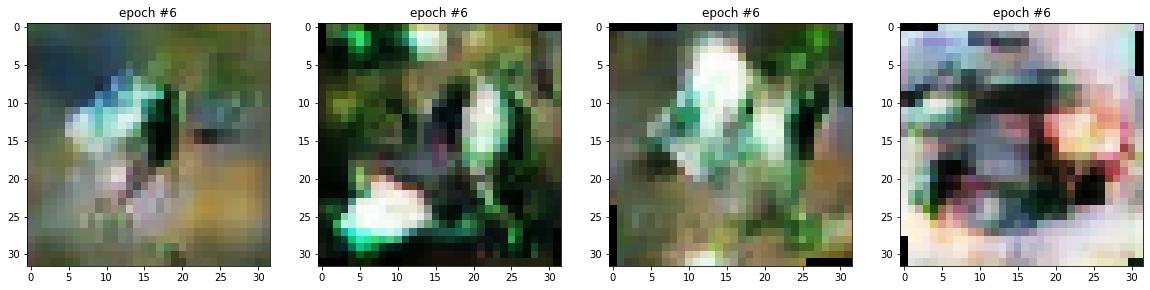

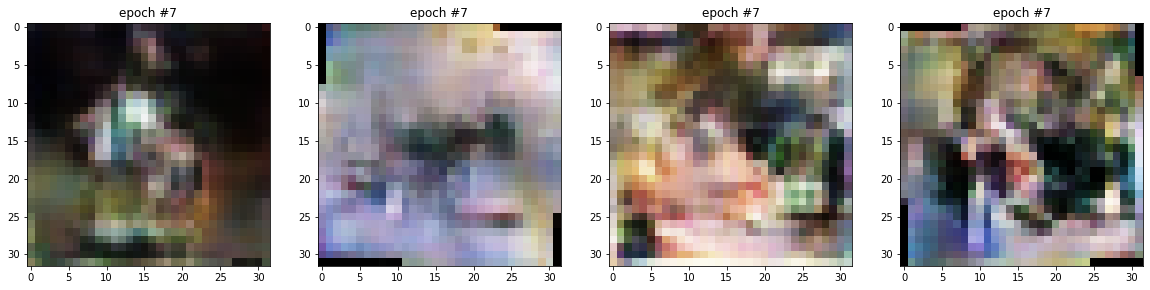

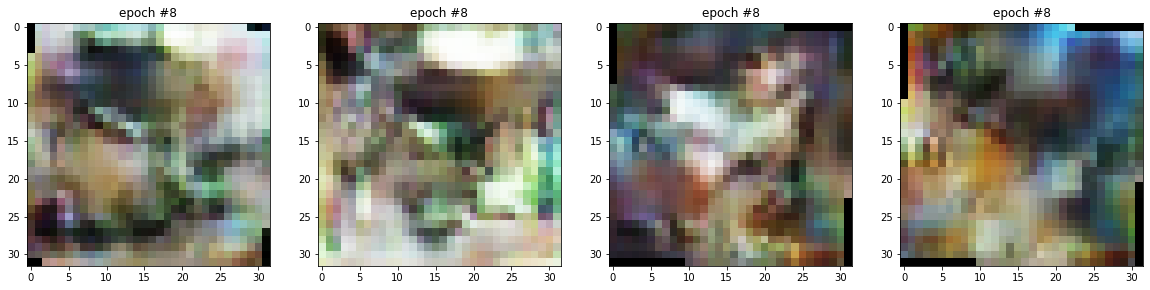

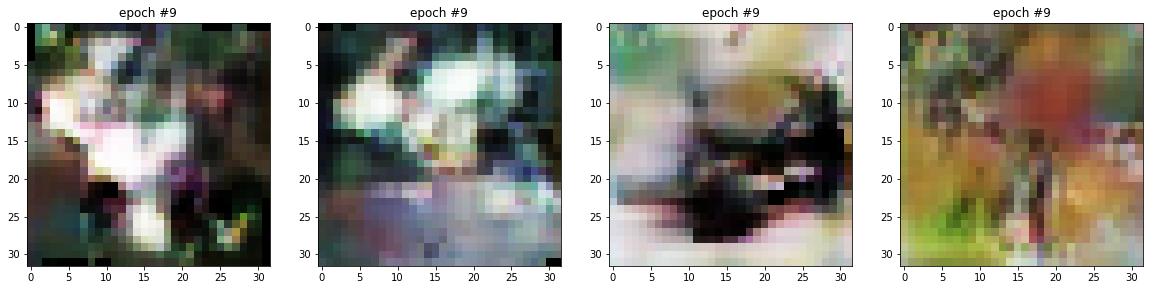

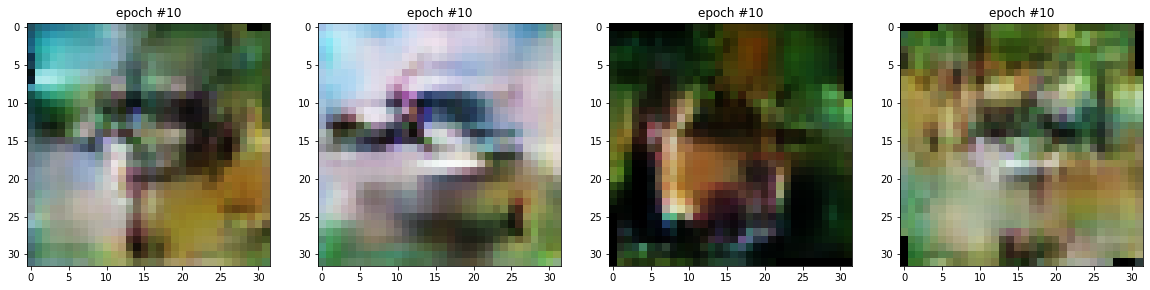

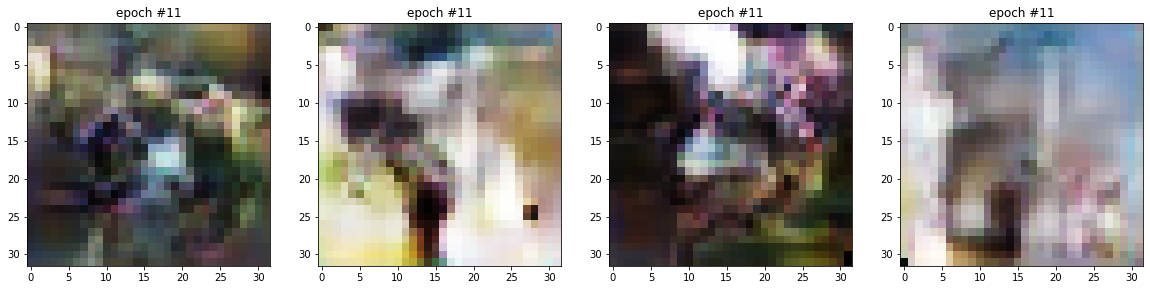

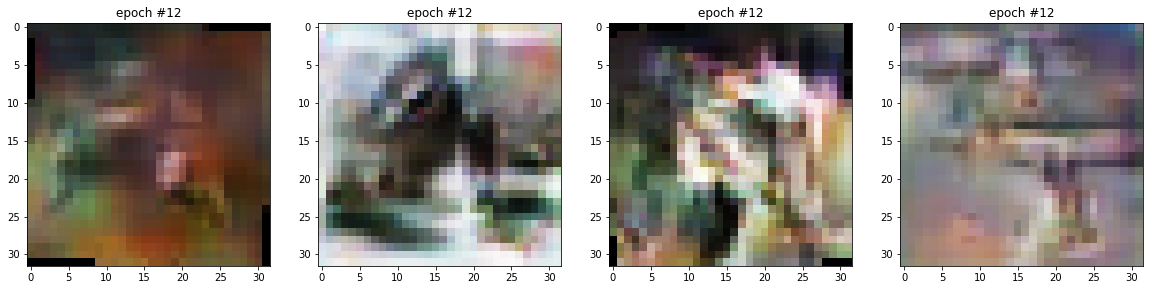

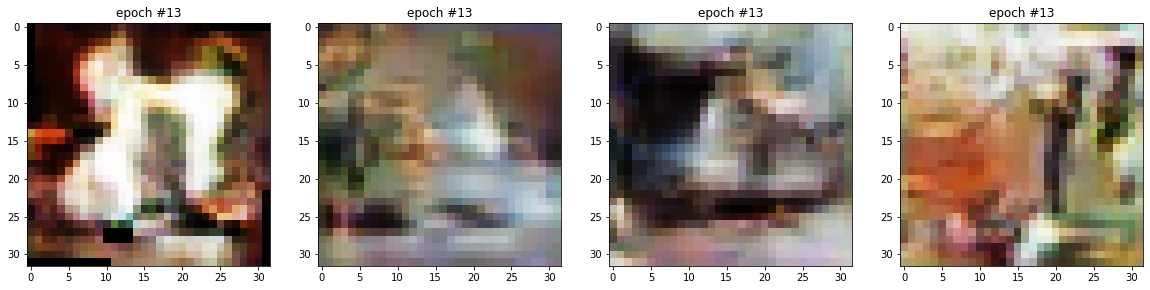

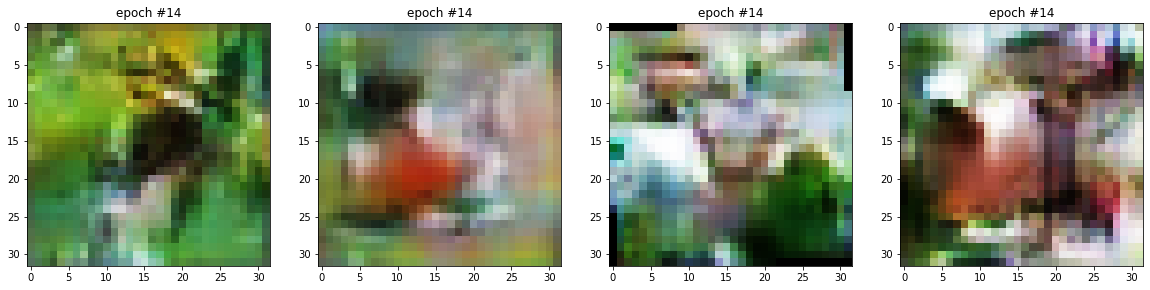

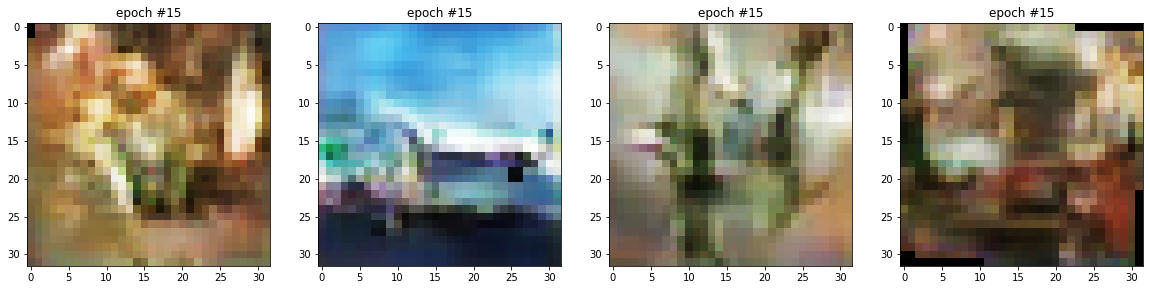

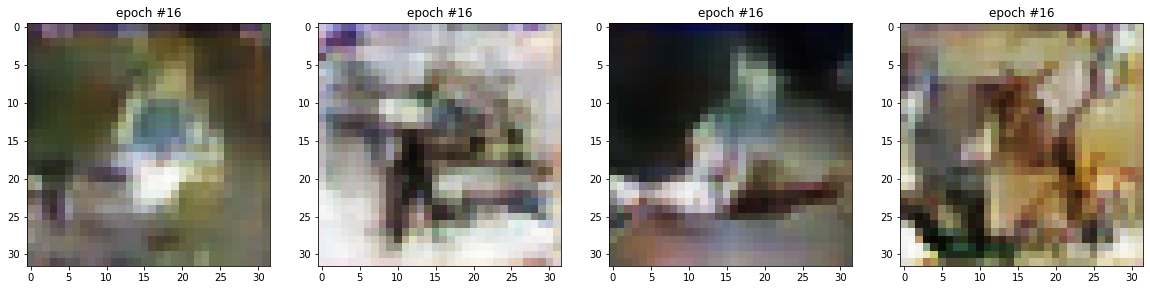

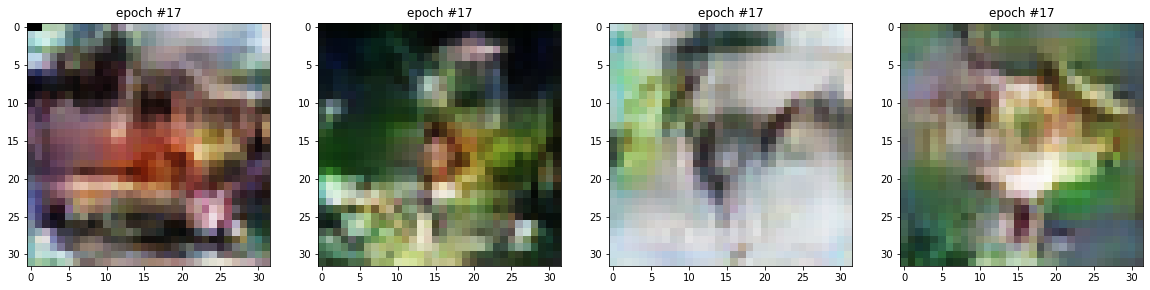

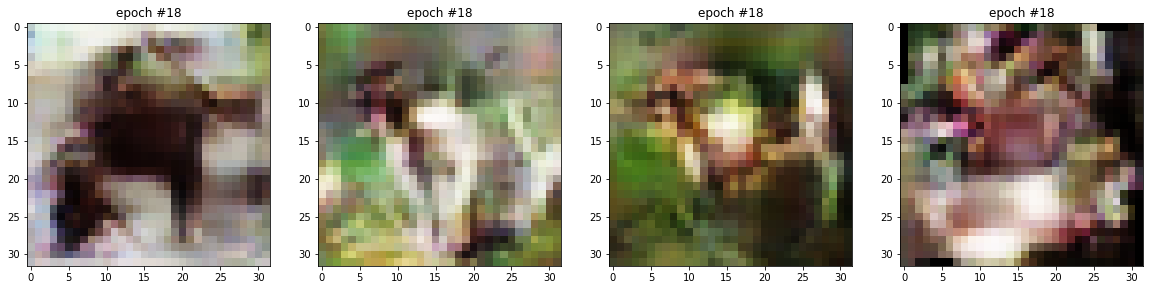

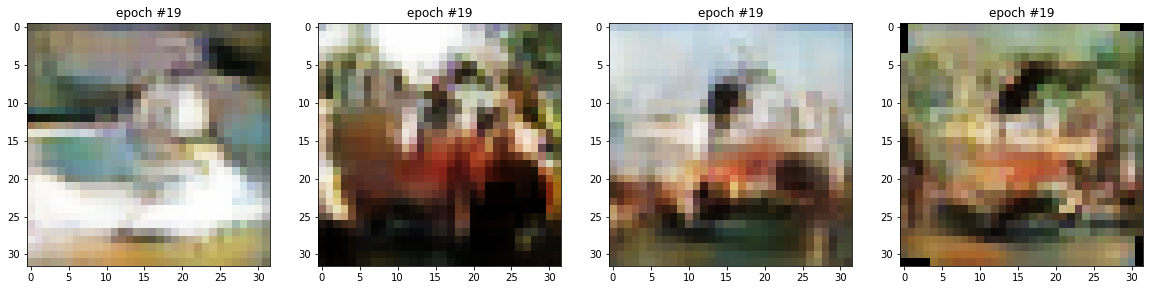

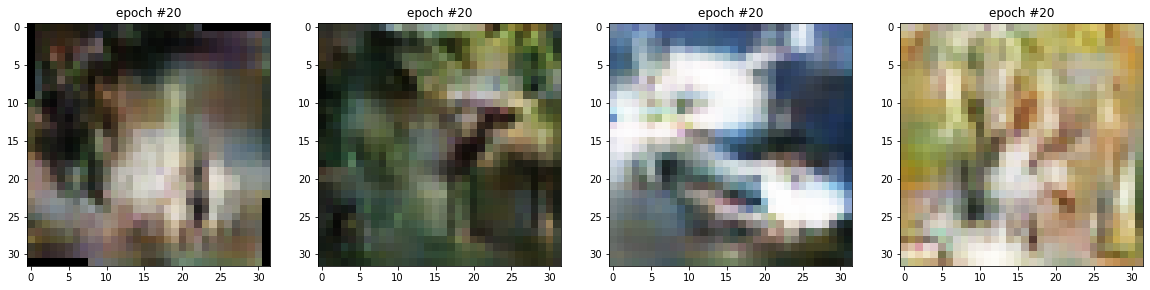

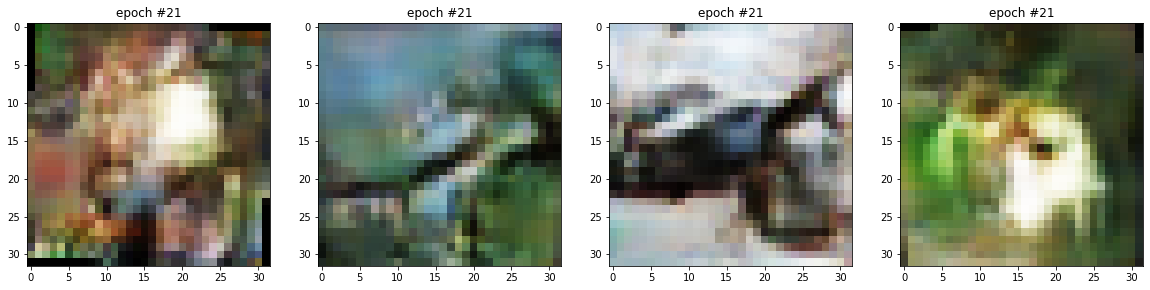

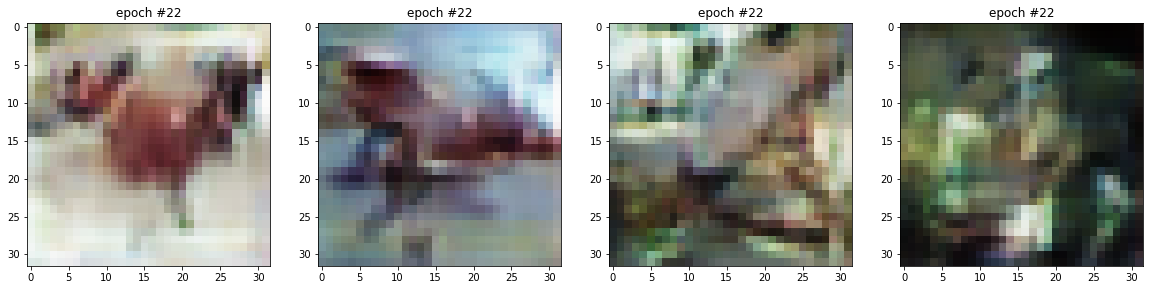

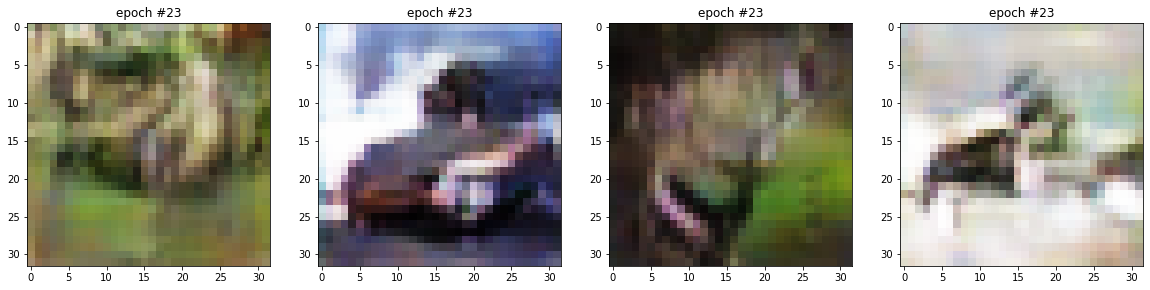

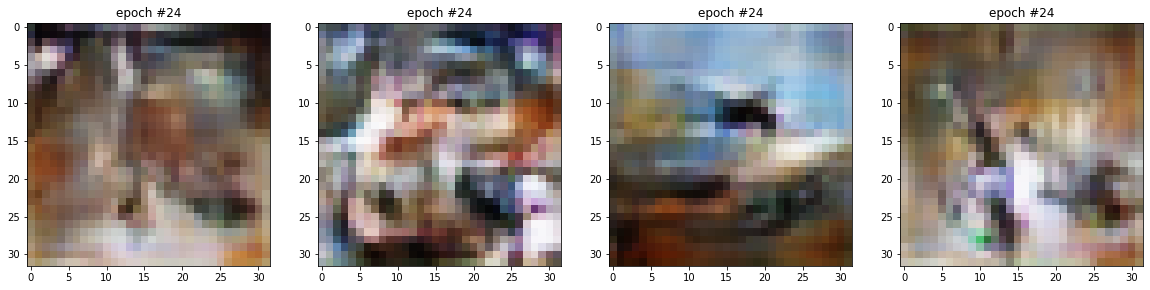

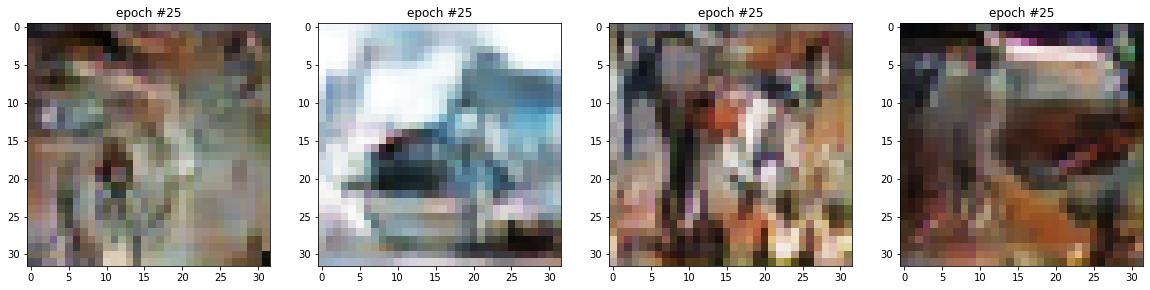

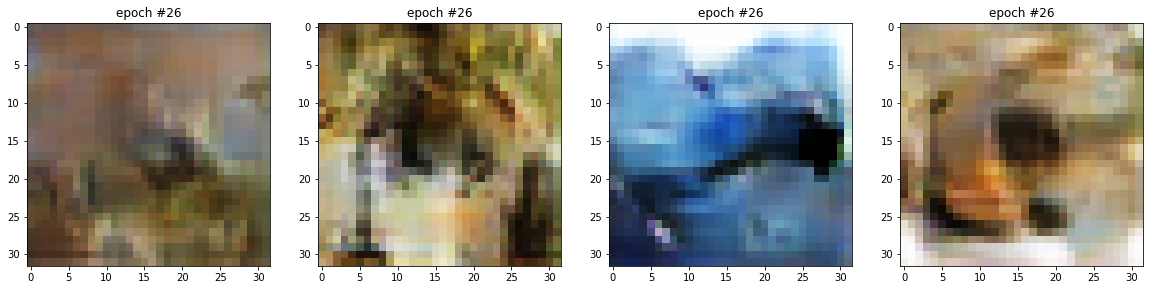

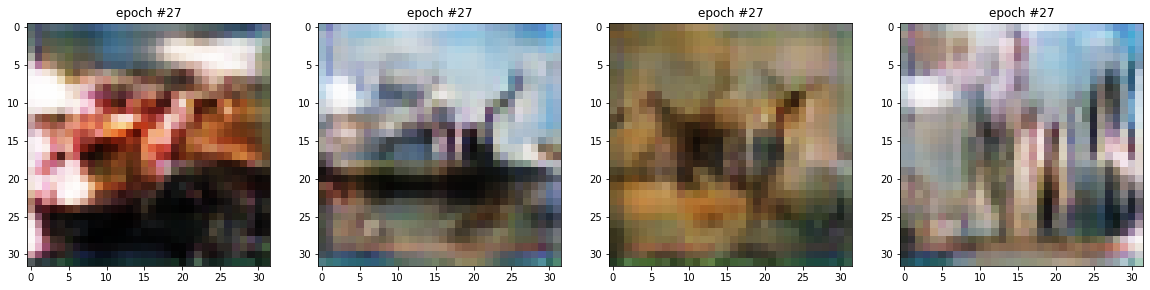

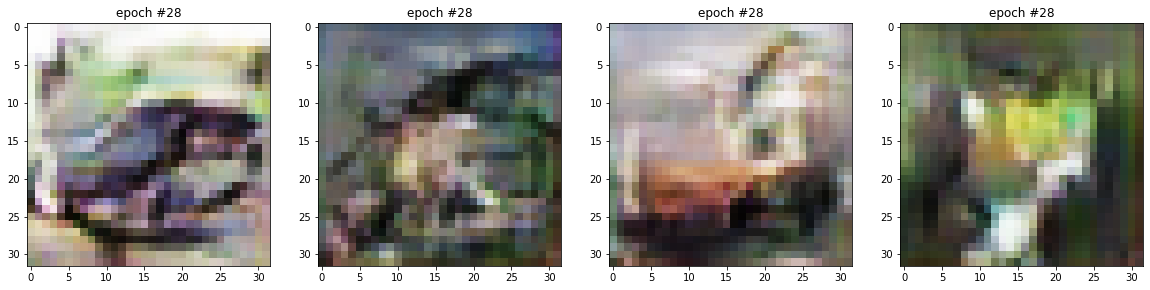

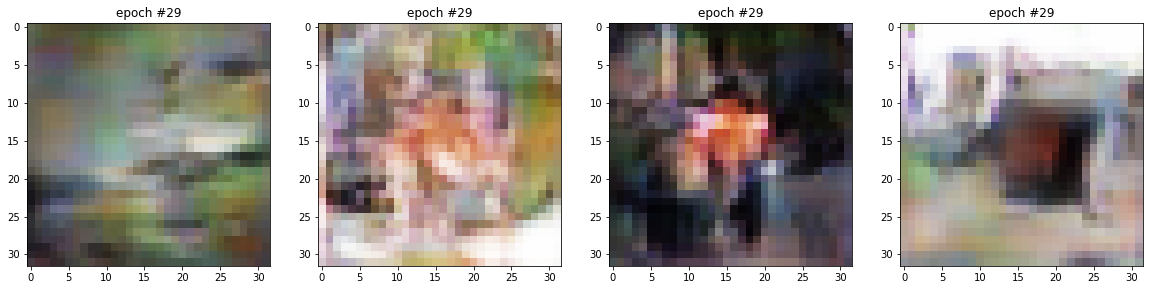

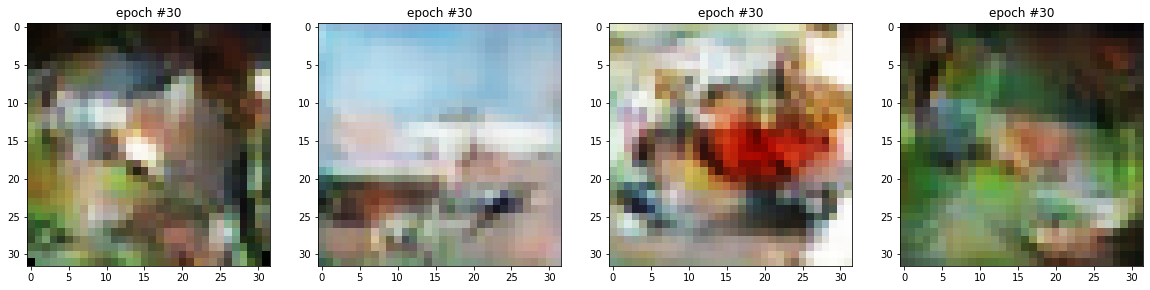

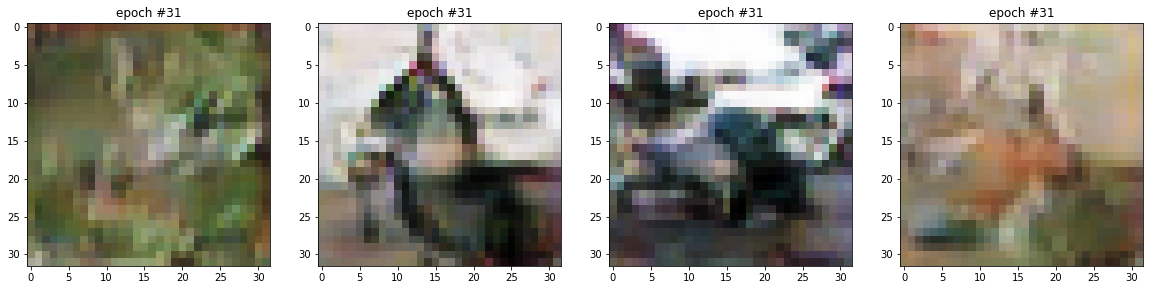

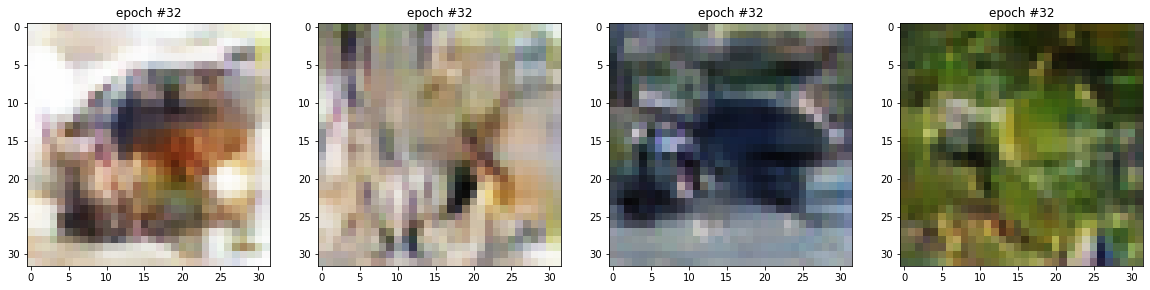

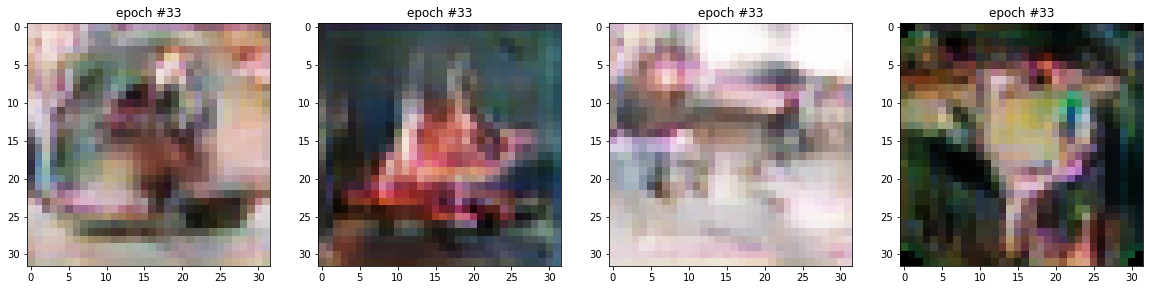

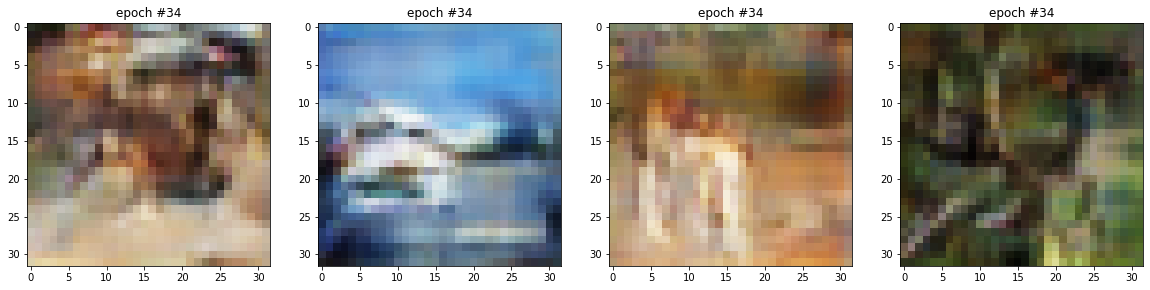

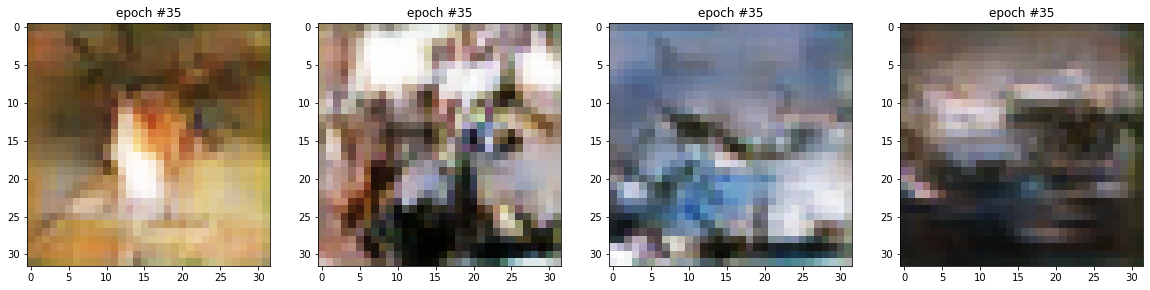

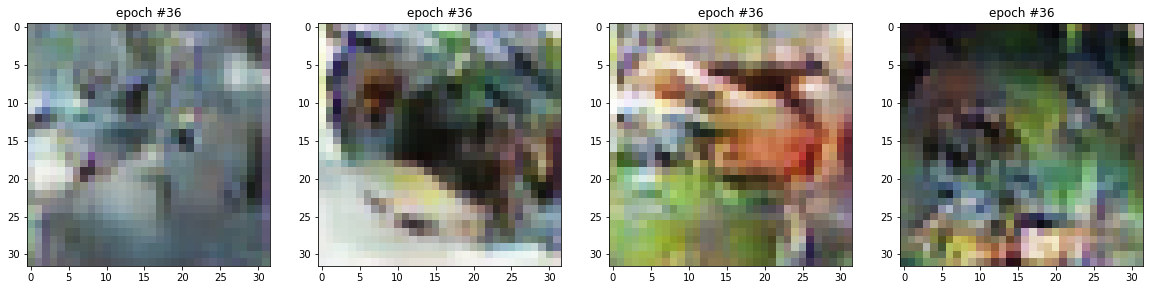

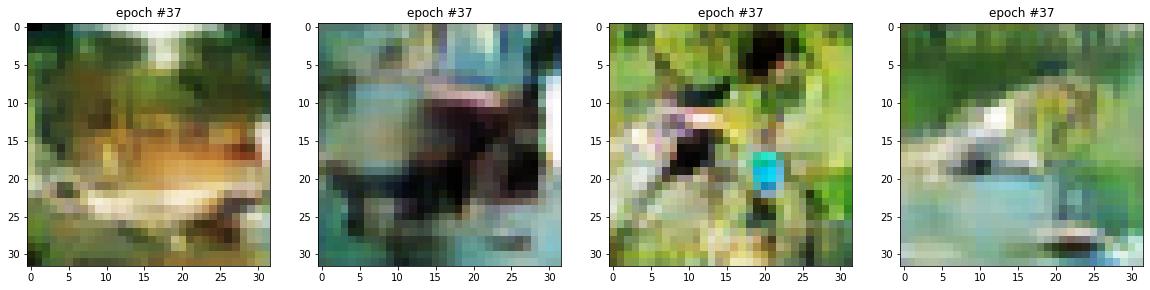

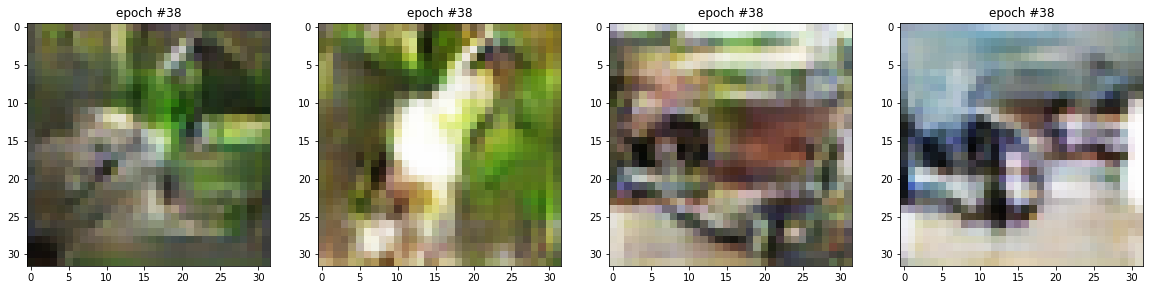

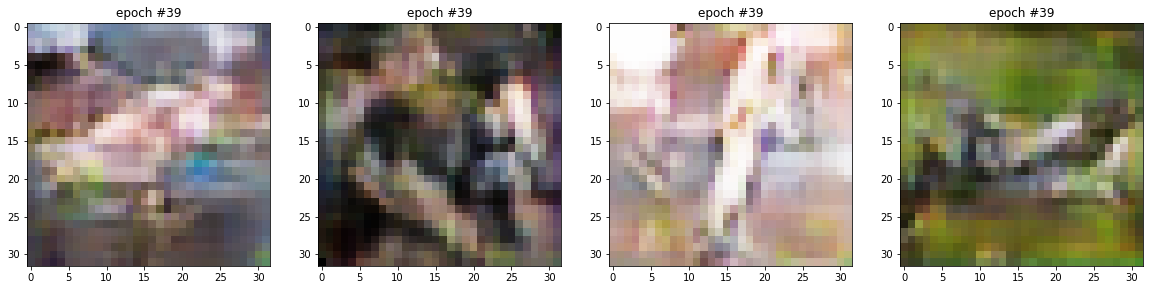

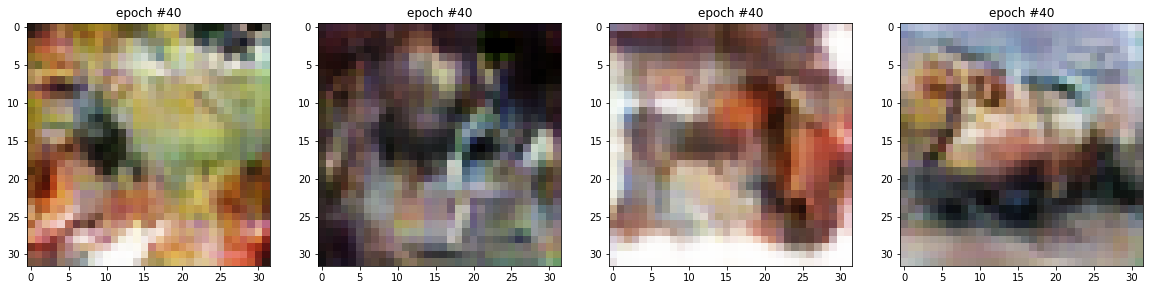

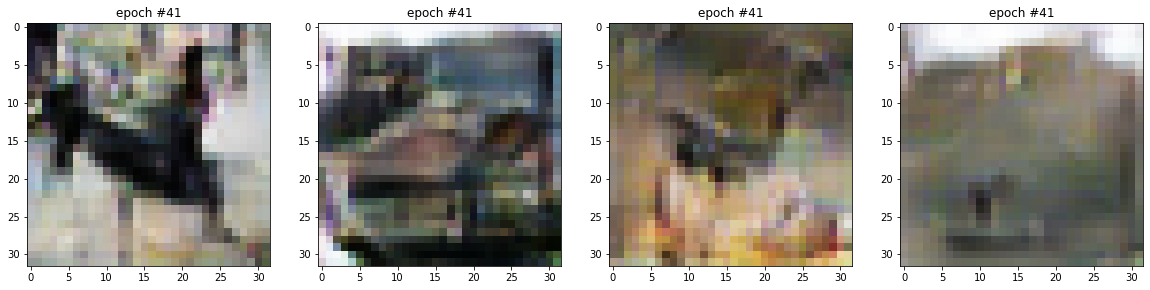

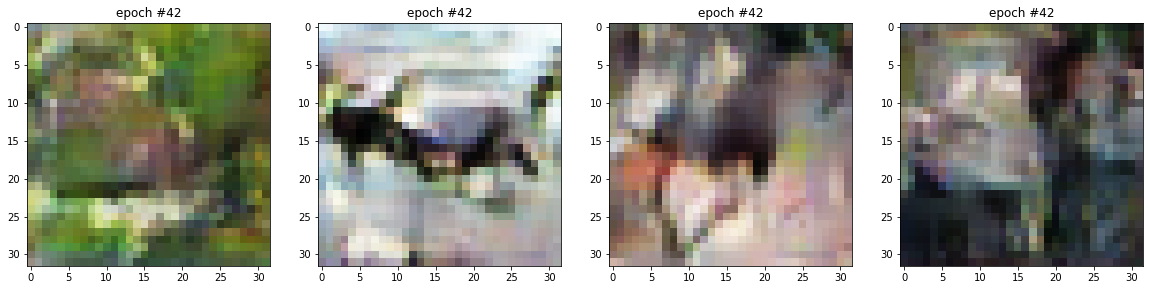

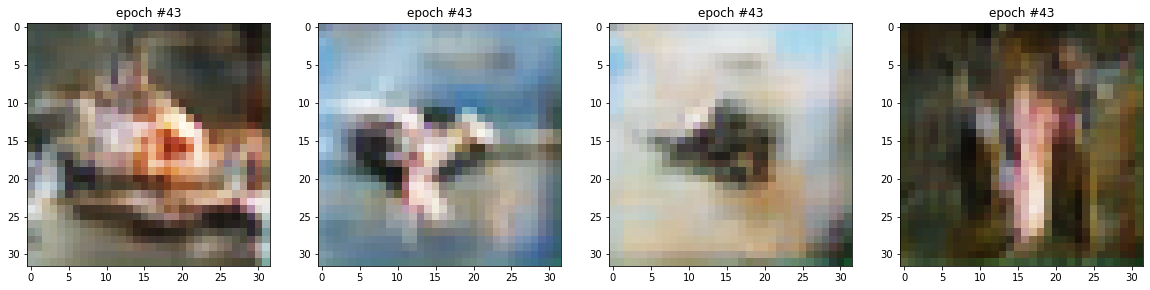

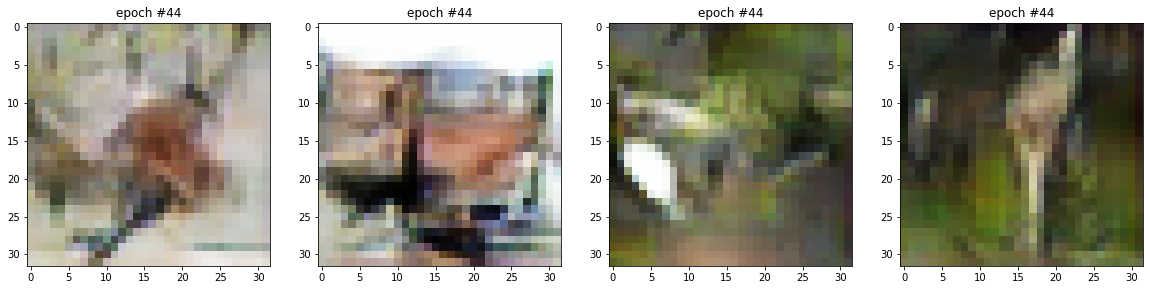

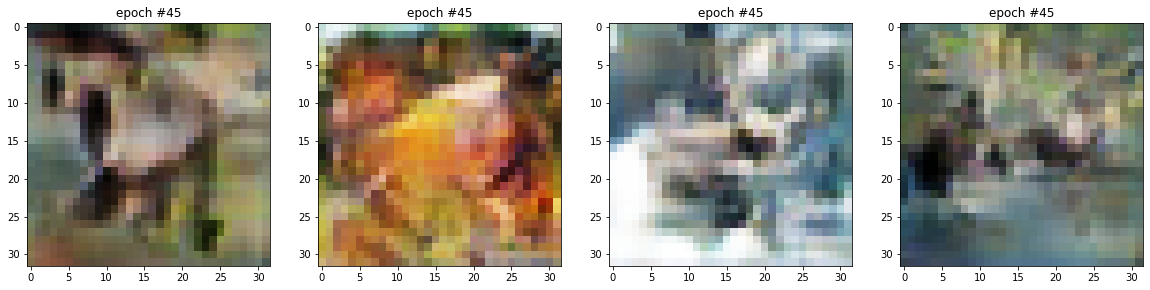

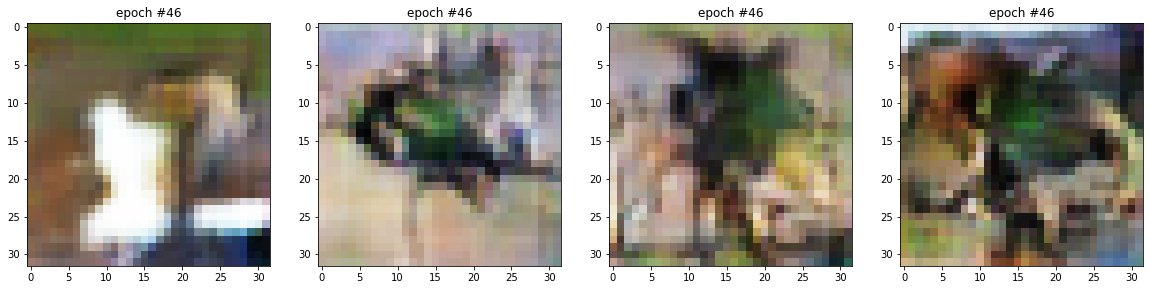

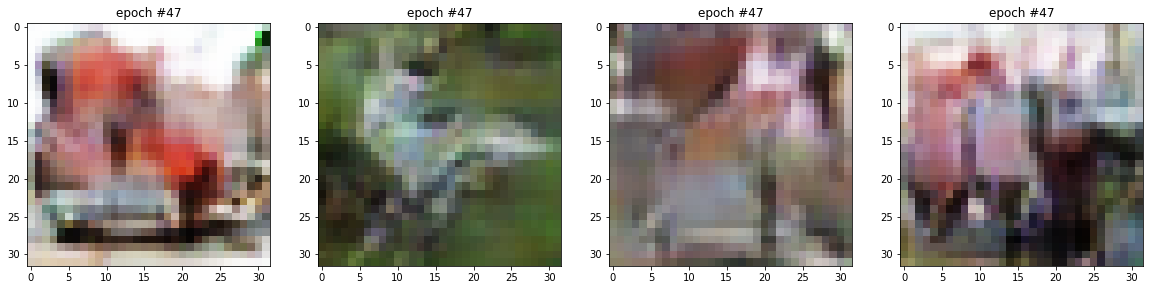

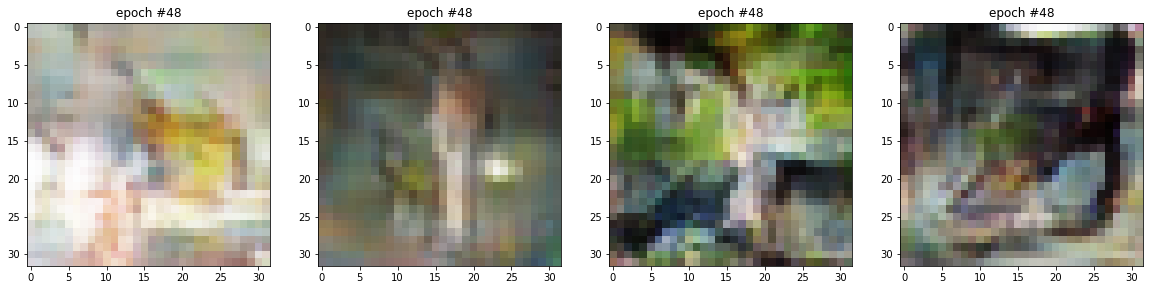

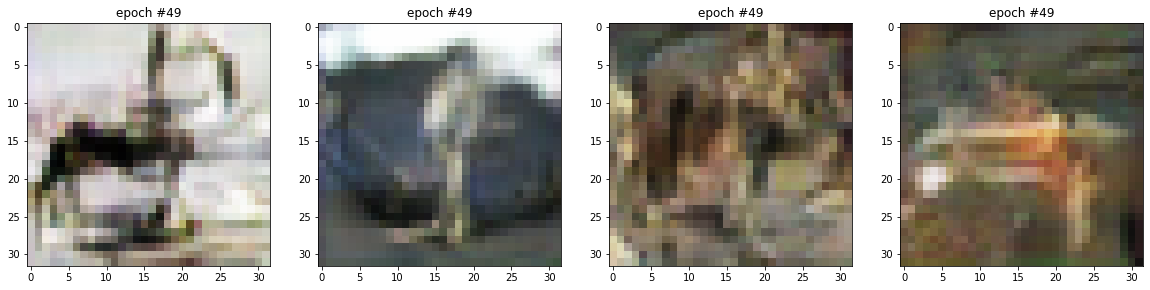

In [14]:
import matplotlib.pyplot as plt

for epoch_number, epoch_examples in enumerate(examples):
    ncols = len(epoch_examples)
    nrows = 1
    
    fig, ax = plt.subplots(nrows, ncols, figsize=(5*ncols, 5*nrows))
    
    for i in range(len(epoch_examples)):
        ax[i%ncols].imshow(epoch_examples[i].transpose((1, 2, 0)))
        ax[i%ncols].set_title(f'epoch #{epoch_number}')